In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mobile_data = pd.read_csv("MobilePhones.csv")#reading in dataset

In [3]:
mobile_data
#checking for null features or empty columns that would require pre-processing , there seems to be none

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
mobile_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


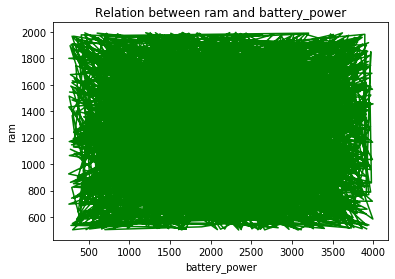

In [6]:
#trying to figure out the relationship betwwen ram and battery power, but data doesn't return a conclusive answer
plt.plot(mobile_data['ram'], mobile_data['battery_power'], color='green')# label = 'Nigeria')

#plt.plot(India['GDP'], India['infant deaths'], color='orange', label = 'India')
plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title("Relation between ram and battery_power")
#plt.legend()
plt.show()

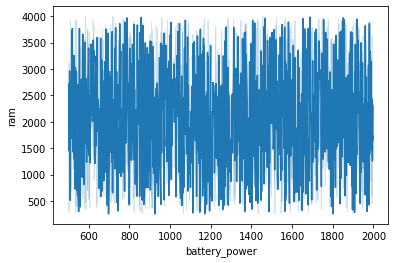

In [7]:
sns.lineplot(x='battery_power', y='ram', data=mobile_data)#let's try a line plot

In [ ]:
#ram seems to have a rocky(unstable) relationship with battery power, let's do it in another way

In [8]:
ram_first = mobile_data[mobile_data['price_range']==0]['ram']#ram data where price = 0

battery_power_first = mobile_data[mobile_data['price_range']==0]['battery_power'] # battery power data where price = 0

ram_second = mobile_data[mobile_data['price_range']==1]['ram']#ram data where price = 1

battery_power_second = mobile_data[mobile_data['price_range']==1]['battery_power'] # battery power data where price = 1

ram_third = mobile_data[mobile_data['price_range']==2]['ram']# ram data where price = 2

battery_power_third = mobile_data[mobile_data['price_range']==2]['battery_power']# battery power data where price = 2

ram_fourth = mobile_data[mobile_data['price_range']==3]['ram']# ram data where price = 3

battery_power_fourth = mobile_data[mobile_data['price_range']==3]['battery_power']# battery power data where price = 3


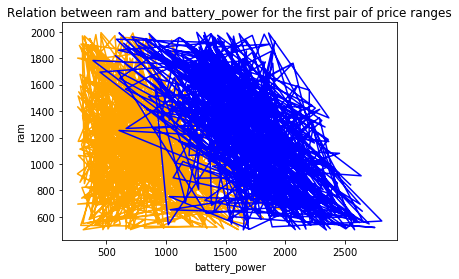

In [9]:

plt.plot(ram_first, battery_power_first, color='orange', label='Range 0')
plt.plot(ram_second, battery_power_second, color='blue', label='Range 1')
plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title("Relation between ram and battery_power for the first pair of price ranges")
#plt.legend()
plt.show()
#The graph is still a little undiscernable


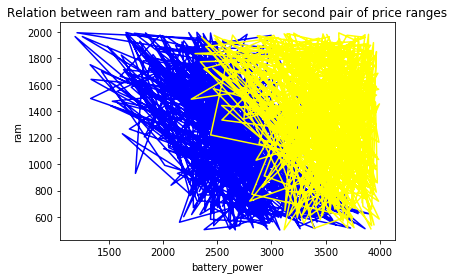

In [10]:
plt.plot(ram_third, battery_power_third, color='blue', label='Range 2')


plt.plot(ram_fourth, battery_power_fourth, color='yellow', label='Range 3')

plt.xlabel('battery_power')
plt.ylabel('ram')
plt.title("Relation between ram and battery_power for second pair of price ranges")
#plt.legend()
plt.show()
#we still don't get a conclusive answer

In [11]:
#Using scatter points may prove more fruitful

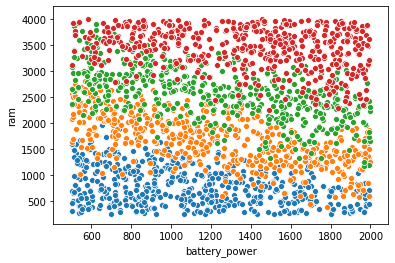

In [11]:
sns.scatterplot(x=battery_power_first, y=ram_first, data=mobile_data)
sns.scatterplot(x=battery_power_second, y=ram_second, data=mobile_data)
sns.scatterplot(x=battery_power_third, y=ram_third, data=mobile_data)
sns.scatterplot(x=battery_power_fourth, y=ram_fourth, data=mobile_data)
plt.show()

In [ ]:
#the scatter plot seems to indicate a high positive correlation between ram and battery power, implicitly there may also
#be a relation between ram and price range, lets check

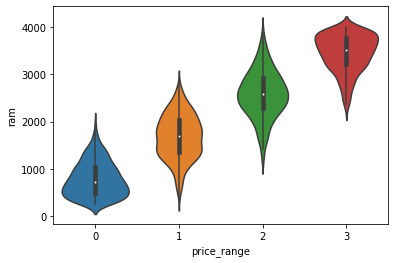

In [12]:
sns.violinplot(x='price_range', y='ram', data=mobile_data) #price seems to increase with ram

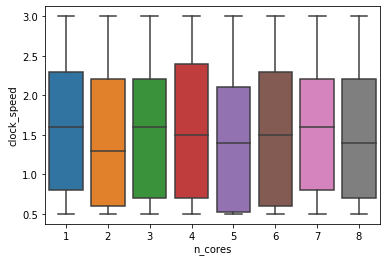

In [13]:
sns.boxplot(x='n_cores', y='clock_speed', data=mobile_data)#relation between no of processor cores and clock_speed,suprisingly max and min values for the diffenrent ranges of cores seem to be similar,
#so no correlation really even though the median values fluctuate a little between the ranges

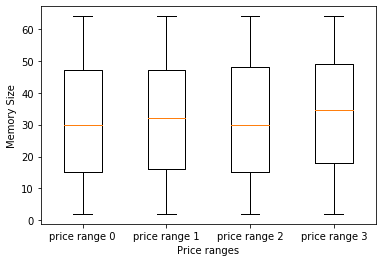

In [14]:
#checking out the relation between price range and memory size and suprisingly, there seems to be litte change in price
#as memory sizes increase
plt.boxplot([mobile_data[mobile_data['price_range']==0]['int_memory'], mobile_data[mobile_data['price_range']==1]['int_memory'], mobile_data[mobile_data['price_range']==2]['int_memory'], mobile_data[mobile_data['price_range']==3]['int_memory']], labels=['price range 0','price range 1','price range 2','price range 3'])
plt.ylabel('Memory Size')
plt.xlabel('Price ranges')
plt.show()

In [15]:
mobile_data.sort_values("sc_h")#sorting values for screen height
#curiosly, we can see that as screen weight increases screen height increases but not vice versa

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
999,1777,1,3.0,0,3,0,20,0.6,188,6,...,511,616,3868,5,1,7,0,1,1,3
207,1265,0,1.5,0,7,0,49,0.7,182,5,...,690,836,1362,5,0,12,0,0,1,1
1441,599,1,2.9,0,0,1,64,0.3,186,8,...,103,646,3396,5,3,7,1,0,0,2
1428,1823,0,2.8,1,11,0,10,0.6,81,8,...,362,1250,1812,5,0,19,1,1,1,2
216,1154,0,1.2,1,0,1,49,0.2,181,8,...,541,1499,978,5,3,7,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,1296,0,1.4,1,3,0,11,0.2,129,7,...,1222,1382,2552,19,8,10,1,1,1,2
868,981,1,1.9,1,0,0,2,0.1,136,3,...,75,688,1539,19,12,19,0,0,0,0
204,1472,1,2.3,0,6,0,61,0.1,168,6,...,710,1052,2677,19,15,8,1,0,0,2
1488,959,1,1.3,1,0,0,36,0.4,196,5,...,1313,1331,3073,19,1,8,1,1,1,3


In [16]:
pred_y = mobile_data['price_range'] #choosing column to predict, i chose price for prediction because in the real world
# all the data reflected in the dataset i.e RAM, Battery Power, number of cores all come together to determine the price
#of the device , so it felt more natural. However there are no exact values for the price only ranges(0,1,2,3) are provided
#which makes it a good dataset for classification

In [17]:
mobile_data1 = mobile_data.drop(labels='price_range', axis=1) #creating dataset without the prediction column
mobile_data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


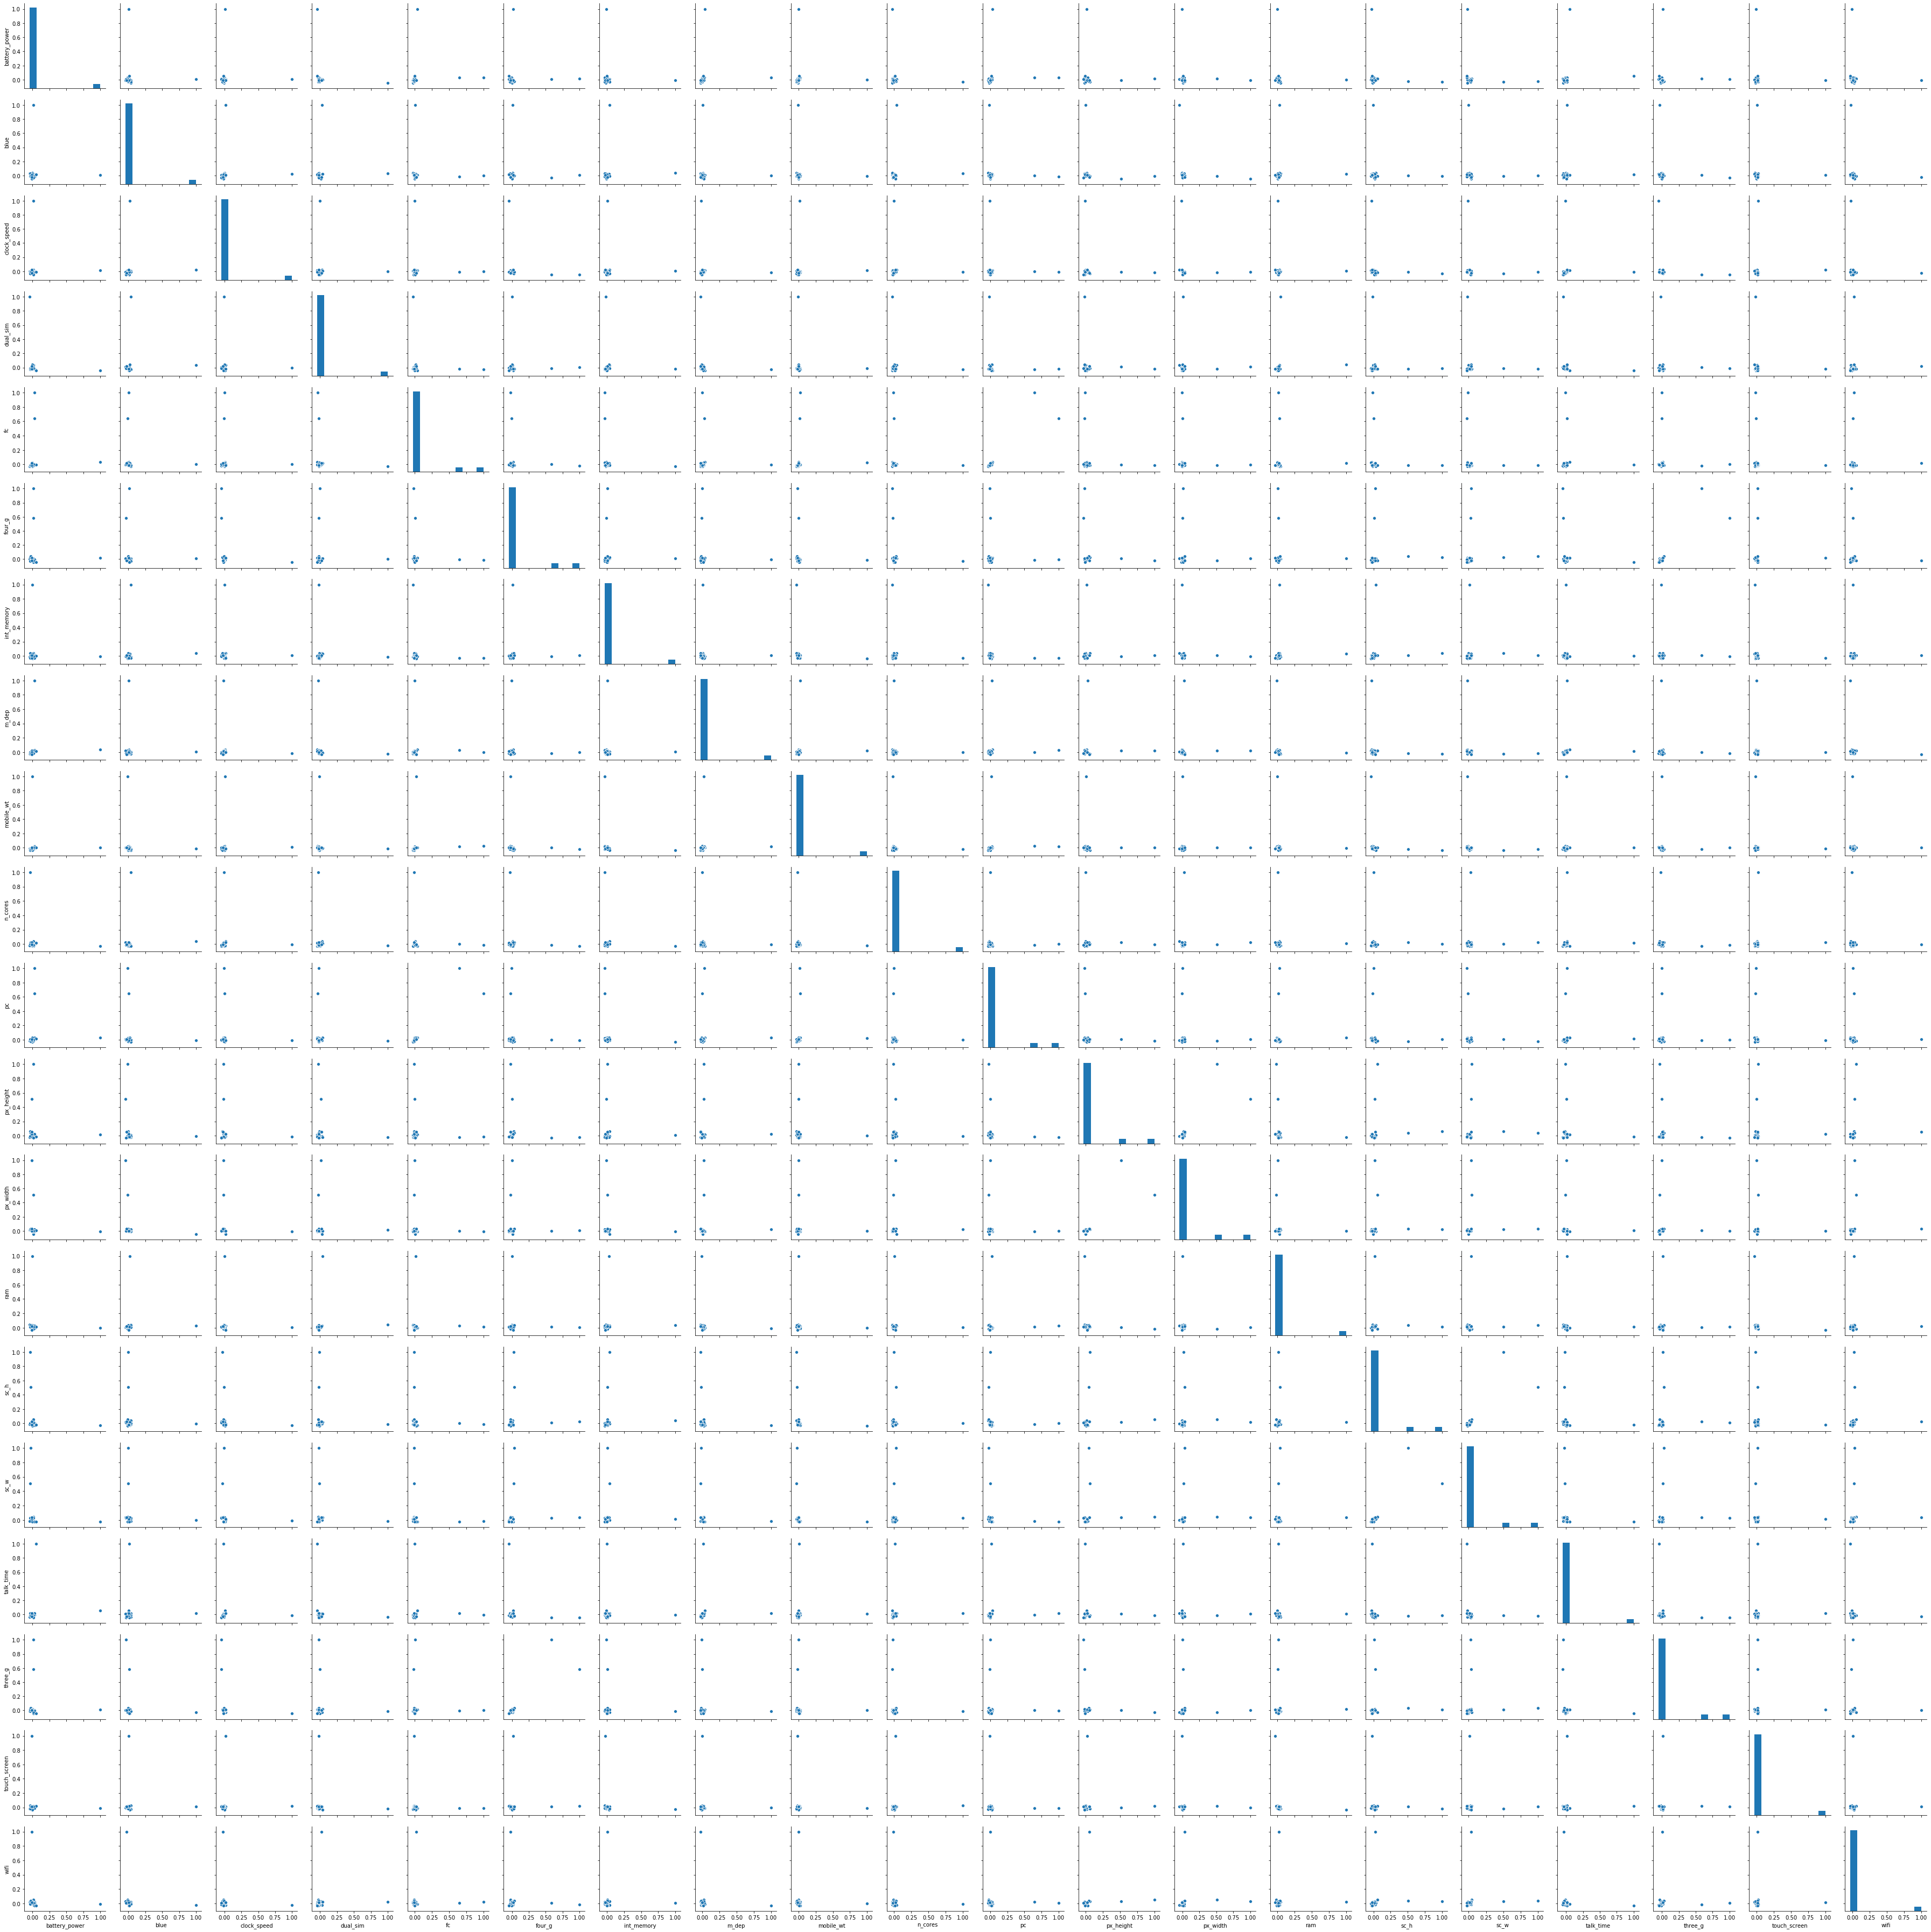

In [18]:
sns.pairplot(mobile_data1.corr()) #data is too unclear, let's try something else

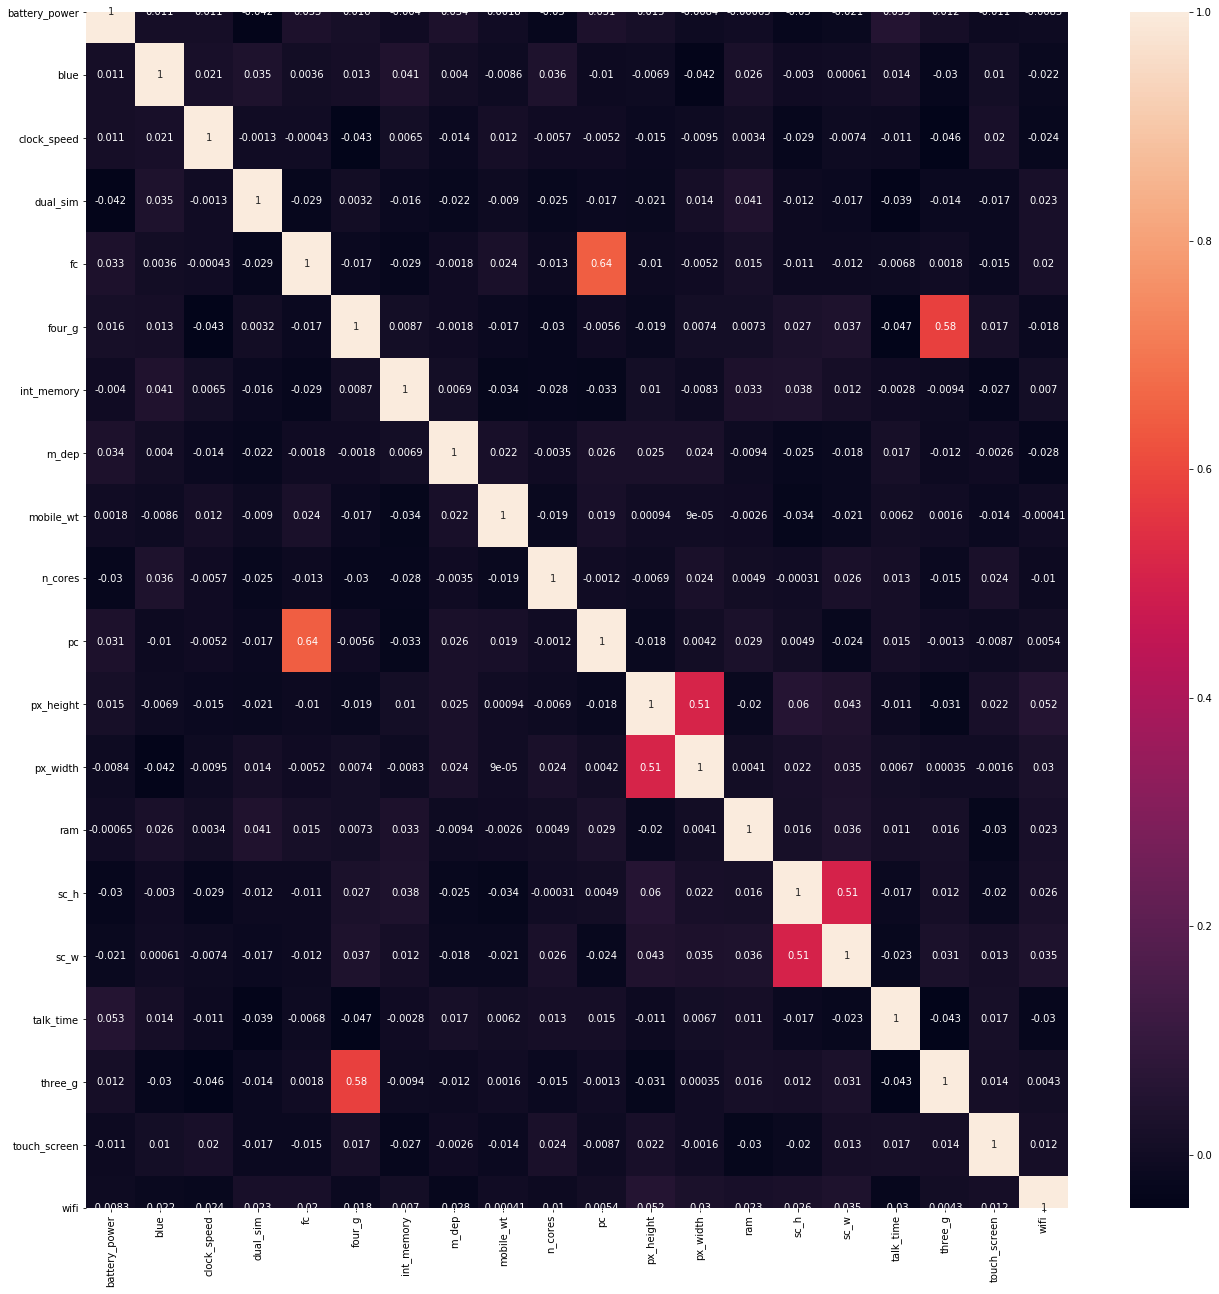

In [19]:
fig, ax = plt.subplots(figsize=(22,22)) 
sns.heatmap(mobile_data1.corr(),annot=True, ax=ax)
plt.show()

In [ ]:
#we find that four g capability and three g capability are slightly correlated, as was alluded to before, screen height and
#weight are partially correlated, front camera and primary camera are significantly correlated, Pixel resolution height and Pixel
#resolution weight are also correlated, but not enought to be dropped.

In [20]:
#80% training set, 10% validation set, 10% test set.
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(mobile_data1, pred_y, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = model_selection.train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [21]:
print(f'Total # of sample in whole dataset: {len(mobile_data1)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in validation dataset: {len(x_valid)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 2000
Total # of sample in train dataset: 1600
Total # of sample in validation dataset: 200
Total # of sample in test dataset: 200


In [22]:
#Standardizing the dataset because they might behave badly if the individual features do not look like standard normally distributed data
from sklearn import preprocessing, linear_model
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)#Fit to data, then transform it.
x_valid = scaler.transform(x_valid)#Perform standardization by centering and scaling.
x_test = scaler.transform(x_test)#Perform standardization by centering and scaling.

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'rbf', C = 0.1, gamma = 0.1)#trying  classification with rbf kernel, regularization parameter 0.1 and gamma 0.1
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.25

In [25]:
classifier = SVC(kernel = 'rbf', C = 0.9, gamma = 5)#trying  classification with rbf kernel, regularization parameter 0.9 and gamma 5
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.25

In [26]:
classifier = SVC(kernel = 'linear', C = 0.9, gamma = 5)#trying  classification with linear kernel, regularization parameter 0.9 and gamma 5
classifier.fit(x_train, y_train)
yc_pred = classifier.predict(x_test)
accuracy_score(y_test, yc_pred)
#maybe the accuracy is higher because data is also linear

0.97

In [27]:
from sklearn.tree import DecisionTreeClassifier
#The criterion function to measure the quality of a split. max depth parameter determines the maximum depth of the tree.
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


clf = clf.fit(x_train,y_train)


y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.75

In [28]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6) #being careful not to cause overfitting with high max_depth


clf = clf.fit(x_train,y_train)


y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.855

In [29]:
from sklearn.linear_model import LogisticRegression
#C is inverse of regularization strength and must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
#random state is to shuffle the data
lr = LogisticRegression(random_state=1, C=10)
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.98

In [ ]:
#A little surprised with the high accuracies, let's see the error of the models

In [30]:
from sklearn import metrics
print ("Overall Error of LR  Model:", 1 - round(metrics.accuracy_score(y_test, y_pred), 2))

Overall Error of LR  Model: 0.020000000000000018


In [31]:
print ("Overall Error of SVC  Model:", 1 - round(metrics.accuracy_score(y_test, yc_pred), 2))

Overall Error of SVC  Model: 0.030000000000000027


In [32]:
#lets use a classification report to make sure
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.96      1.00      0.98        50
           2       0.98      0.98      0.98        44
           3       0.98      0.98      0.98        48

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [33]:
print(classification_report(y_test, yc_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.93      1.00      0.96        50
           2       1.00      0.93      0.96        44
           3       0.96      1.00      0.98        48

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



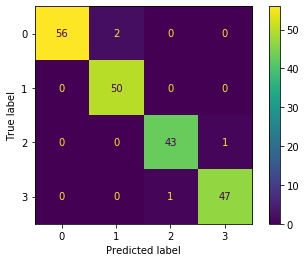

In [34]:
plot_confusion_matrix(lr, x_test, y_test, display_labels=lr.classes_)
plt.show()
#we can seee that 56 of the examples belong to class 0 are correctly labeled.
#the model misclassified two samples from class 0 as class 1
#All samples from class 1 are correctly classified
#model also misclassifies 1 sample from class 2 as class 3
#predicts 1 sample from class 3 as class 2.

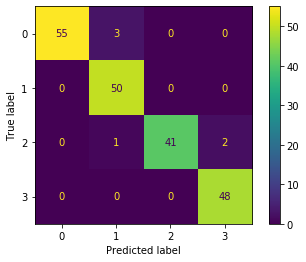

In [35]:
plot_confusion_matrix(classifier, x_test, y_test, display_labels=classifier.classes_)
plt.show()

In [ ]:
#we can seee that 55 of the examples belong to class 0 are correctly labeled.
#the model misclassified three samples from class 0 as class 1
#All samples from class 1 are correctly classified
#model also misclassifies 1 sample from class 2 as class 1
#predicts 2 sample from class 2 as class 3.
#All samples from class 3 are correctly classified